In [1]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#REMOVING ALL WARNING MESSAGES
import warnings
warnings.filterwarnings("ignore")

In [3]:
#IMPORTING THE TRAINING DATASET
df = pd.read_excel('DataDashTrainingData.xlsx')

In [4]:
df.head()

,name,date,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,chatter,followers,following,change,rank,rank on the following day (dpv1),rank 2 days later ( dpv2),rank 3 days later (dpv3)
0,company_46,2021-10-23,[{'text': '.@PM360online calls the work of our...,2.0,2.000000,1.000,NaN,72753,496,0.000110,32.0,29.0,25.0,31.0
1,company_17,2021-10-23,[{'text': '@Amyrive21803741 Yikes! Sorry to he...,3.0,0.000000,0.000,NaN,501445,65,-0.000088,91.0,81.0,83.0,84.0
2,company_91,2021-10-23,[{'text': 'Hellmannâ€™s x AE collab. Dropping ...,10.0,122.800000,3.100,NaN,571479,2999,0.000002,68.0,61.0,86.0,92.0
3,company_2,2021-10-23,"[{'text': '@Charli3BiNks ðŸ‘ ðŸ‘ ðŸ‘ Ok, we...",7.0,0.714286,0.000,NaN,60221,766,0.000017,57.0,52.0,55.0,51.0
4,company_38,2021-10-23,[],240.0,0.741667,0.075,NaN,383493,6181,0.000034,54.0,45.0,35.0,65.0


In [5]:
len(df)

1209

# FEATURE ENGINEERING

In [6]:
df.describe()

,count_tweets,avg_tweet_likes,avg_tweet_retweets,followers,following,change,rank,rank on the following day (dpv1),rank 2 days later ( dpv2),rank 3 days later (dpv3)
count,1007.000000,1209.000000,1209.000000,1.209000e+03,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,13.527309,39.418935,8.591025,1.122702e+06,8081.205128,0.000115,47.000000,47.000000,47.000000,47.000000
std,37.190619,387.018589,82.324540,2.984283e+06,17708.493189,0.000305,26.855589,26.855828,26.855836,26.855836
min,1.000000,0.000000,0.000000,5.110700e+04,4.000000,-0.000357,1.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.094500e+05,337.000000,0.000000,24.000000,24.000000,24.000000,24.000000
50%,5.000000,1.000000,0.166667,3.250900e+05,1397.000000,0.000064,47.000000,47.000000,47.000000,47.000000
75%,17.500000,8.000000,2.000000,7.733170e+05,5489.000000,0.000157,70.500000,70.000000,70.000000,70.000000
max,520.000000,11462.375000,2166.375000,2.389704e+07,105215.000000,0.007013,93.000000,93.000000,93.000000,93.000000


In [7]:
#COUNT OF NULL VALUES
df.isnull().sum()

name                                      0
date                                      0
tweets                                    0
count_tweets                            202
avg_tweet_likes                           0
avg_tweet_retweets                        0
chatter                                 558
followers                                 0
following                                 0
change                                    0
rank                                      0
rank on the following day (dpv1)          0
rank 2 days later            ( dpv2)      0
rank 3 days later          (dpv3)         0
dtype: int64

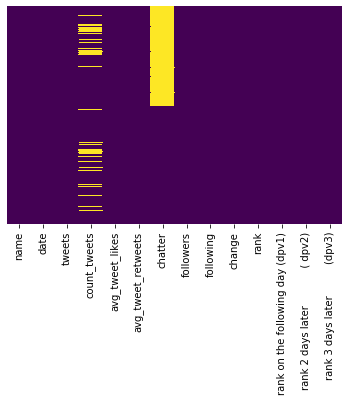

In [8]:
#GETTING THE COLUMNS WITH NULL VALUES
sns.heatmap(df.isnull(),yticklabels= False,cbar =False,cmap ='viridis')

In [9]:
df.name.value_counts()

company_75    13
company_71    13
company_84    13
company_60    13
company_37    13
              ..
company_91    13
company_88    13
company_67    13
company_42    13
company_81    13
Name: name, Length: 93, dtype: int64

In [10]:
#IMPORTING THE TEST DATASET
df_pred = pd.read_csv('testing_data.csv')

In [11]:
df_pred.head()

,ID,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,chatter,followers,following,change,rank
0,1,[{'text': 'JUST IN: Weâ€™re sharing #BloodCanc...,2.0,10.000000,0.5,[{'text': 'RT @SligoLGFA: Sligo LGFA countdown...,72930,496,0.000412,6.0
1,2,[{'text': '@Sadu_SBS DM us your order # &amp; ...,3.0,0.333333,0.0,[{'text': '@Abercrombie I bought a fewT-shirtâ...,501153,65,-0.000060,88.0
2,3,[{'text': 'Lifeâ€™s too short to wear uncomfor...,10.0,24.500000,2.3,[{'text': '@AEO I re designed your logo for fu...,571362,1290,0.000021,64.0
3,4,[{'text': '@emma_lynne03 We just have one ques...,4.0,0.250000,0.0,[{'text': '@MurrayLinus @BelfastHome @tinamcke...,60224,767,0.000017,69.0
4,5,"[{'text': ""@NYYash Unfortunately flight 790 ha...",20.0,0.300000,0.0,[{'text': 'RT @BeciMahnken: Trams going to gat...,383830,6179,0.000086,49.0


In [12]:
df.isnull().sum()

name                                      0
date                                      0
tweets                                    0
count_tweets                            202
avg_tweet_likes                           0
avg_tweet_retweets                        0
chatter                                 558
followers                                 0
following                                 0
change                                    0
rank                                      0
rank on the following day (dpv1)          0
rank 2 days later            ( dpv2)      0
rank 3 days later          (dpv3)         0
dtype: int64

In [13]:
#NEW FEATURE COUNTING THE NUMBER OF MENTIONS
def mention_count(text):
    return text.count('@')
    


In [14]:
df['mentions'] = df['tweets'].apply(mention_count)
df_pred['mentions'] = df_pred['tweets'].apply(mention_count)



In [15]:
df['Total_likes_a_day'] = df['count_tweets']*df['avg_tweet_likes']
df['Total_retweets'] = df['avg_tweet_retweets']*df['count_tweets']
df['Followers_following_ratio'] = df['followers']/df['following']
df['engagement'] = df['Total_likes_a_day']/df['followers']



In [16]:
df.head()

,name,date,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,chatter,followers,following,change,rank,rank on the following day (dpv1),rank 2 days later ( dpv2),rank 3 days later (dpv3),mentions,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement
0,company_46,2021-10-23,[{'text': '.@PM360online calls the work of our...,2.0,2.000000,1.000,NaN,72753,496,0.000110,32.0,29.0,25.0,31.0,1,4.0,2.0,146.679435,0.000055
1,company_17,2021-10-23,[{'text': '@Amyrive21803741 Yikes! Sorry to he...,3.0,0.000000,0.000,NaN,501445,65,-0.000088,91.0,81.0,83.0,84.0,3,0.0,0.0,7714.538462,0.000000
2,company_91,2021-10-23,[{'text': 'Hellmannâ€™s x AE collab. Dropping ...,10.0,122.800000,3.100,NaN,571479,2999,0.000002,68.0,61.0,86.0,92.0,7,1228.0,31.0,190.556519,0.002149
3,company_2,2021-10-23,"[{'text': '@Charli3BiNks ðŸ‘ ðŸ‘ ðŸ‘ Ok, we...",7.0,0.714286,0.000,NaN,60221,766,0.000017,57.0,52.0,55.0,51.0,7,5.0,0.0,78.617493,0.000083
4,company_38,2021-10-23,[],240.0,0.741667,0.075,NaN,383493,6181,0.000034,54.0,45.0,35.0,65.0,0,178.0,18.0,62.043844,0.000464


SENTIMENT ANALYSIS ON TEXT

In [17]:
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import string
from collections import Counter

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sameer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sameer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sameer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sameer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
#THE FUNCTION WILL RETURN A VALUE OF +1 TO POSITIVE AND -1 TO NEGATIVE SENTENCE

def sentiment_analyse(text):
    lower_case = text.lower()
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    tokenized_words = word_tokenize(cleaned_text, "english")
    
    
    score = SentimentIntensityAnalyzer().polarity_scores(cleaned_text)
    if 5*score['neg'] > score['pos']:
        return -1
    elif 5*score['neg'] < score['pos']:
        return 1
    else:
        return 0

In [20]:
df['tweets'] = df['tweets'].apply(sentiment_analyse)
df_pred['tweets'] = df_pred['tweets'].apply(sentiment_analyse)

In [21]:
df.head()

,name,date,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,chatter,followers,following,change,rank,rank on the following day (dpv1),rank 2 days later ( dpv2),rank 3 days later (dpv3),mentions,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement
0,company_46,2021-10-23,1,2.0,2.000000,1.000,NaN,72753,496,0.000110,32.0,29.0,25.0,31.0,1,4.0,2.0,146.679435,0.000055
1,company_17,2021-10-23,1,3.0,0.000000,0.000,NaN,501445,65,-0.000088,91.0,81.0,83.0,84.0,3,0.0,0.0,7714.538462,0.000000
2,company_91,2021-10-23,1,10.0,122.800000,3.100,NaN,571479,2999,0.000002,68.0,61.0,86.0,92.0,7,1228.0,31.0,190.556519,0.002149
3,company_2,2021-10-23,1,7.0,0.714286,0.000,NaN,60221,766,0.000017,57.0,52.0,55.0,51.0,7,5.0,0.0,78.617493,0.000083
4,company_38,2021-10-23,0,240.0,0.741667,0.075,NaN,383493,6181,0.000034,54.0,45.0,35.0,65.0,0,178.0,18.0,62.043844,0.000464


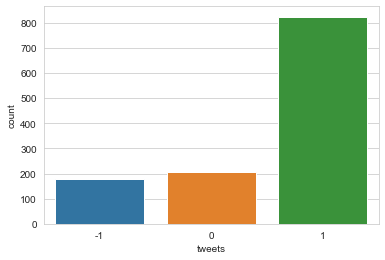

In [22]:

sns.set_style('whitegrid')
sns.countplot(x ='tweets',data =df)

In [23]:
#FILLING ALL THE NULL VALUES WITH 0
df.fillna(0, inplace=True)

In [24]:
df.head()

,name,date,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,chatter,followers,following,change,rank,rank on the following day (dpv1),rank 2 days later ( dpv2),rank 3 days later (dpv3),mentions,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement
0,company_46,2021-10-23,1,2.0,2.000000,1.000,0,72753,496,0.000110,32.0,29.0,25.0,31.0,1,4.0,2.0,146.679435,0.000055
1,company_17,2021-10-23,1,3.0,0.000000,0.000,0,501445,65,-0.000088,91.0,81.0,83.0,84.0,3,0.0,0.0,7714.538462,0.000000
2,company_91,2021-10-23,1,10.0,122.800000,3.100,0,571479,2999,0.000002,68.0,61.0,86.0,92.0,7,1228.0,31.0,190.556519,0.002149
3,company_2,2021-10-23,1,7.0,0.714286,0.000,0,60221,766,0.000017,57.0,52.0,55.0,51.0,7,5.0,0.0,78.617493,0.000083
4,company_38,2021-10-23,0,240.0,0.741667,0.075,0,383493,6181,0.000034,54.0,45.0,35.0,65.0,0,178.0,18.0,62.043844,0.000464


In [25]:
df.describe()

,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,followers,following,change,rank,rank on the following day (dpv1),rank 2 days later ( dpv2),rank 3 days later (dpv3),mentions,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement
count,1209.000000,1209.000000,1209.000000,1209.000000,1.209000e+03,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,0.533499,11.267163,39.418935,8.591025,1.122702e+06,8081.205128,0.000115,47.000000,47.000000,47.000000,47.000000,5.732010,261.060380,57.574855,6232.793886,0.000221
std,0.738540,34.312412,387.018589,82.324540,2.984283e+06,17708.493189,0.000305,26.855589,26.855828,26.855836,26.855836,7.473417,2882.263687,708.131573,20390.613599,0.003024
min,-1.000000,0.000000,0.000000,0.000000,5.110700e+04,4.000000,-0.000357,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.050107,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.094500e+05,337.000000,0.000000,24.000000,24.000000,24.000000,24.000000,0.000000,0.000000,0.000000,43.777786,0.000000
50%,1.000000,3.000000,1.000000,0.166667,3.250900e+05,1397.000000,0.000064,47.000000,47.000000,47.000000,47.000000,2.000000,6.000000,1.000000,180.341246,0.000025
75%,1.000000,11.000000,8.000000,2.000000,7.733170e+05,5489.000000,0.000157,70.500000,70.000000,70.000000,70.000000,9.000000,33.000000,7.000000,885.395626,0.000101
max,1.000000,520.000000,11462.375000,2166.375000,2.389704e+07,105215.000000,0.007013,93.000000,93.000000,93.000000,93.000000,47.000000,91699.000000,17331.000000,134082.800000,0.103775


In [26]:
#DEFINING THE NEW VARIABLES FOR THE TEST DATASET

df_pred['Total_likes_a_day'] = df_pred['count_tweets']*df_pred['avg_tweet_likes']
df_pred['Total_retweets'] = df_pred['avg_tweet_retweets']*df_pred['count_tweets']
df_pred['Followers_following_ratio'] = df_pred['followers']/df_pred['following']
df_pred['engagement'] = df_pred['Total_likes_a_day']/df_pred['followers']

In [27]:
df_pred.head()

,ID,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,chatter,followers,following,change,rank,mentions,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement
0,1,-1,2.0,10.000000,0.5,[{'text': 'RT @SligoLGFA: Sligo LGFA countdown...,72930,496,0.000412,6.0,0,20.0,1.0,147.036290,0.000274
1,2,1,3.0,0.333333,0.0,[{'text': '@Abercrombie I bought a fewT-shirtâ...,501153,65,-0.000060,88.0,3,1.0,0.0,7710.046154,0.000002
2,3,-1,10.0,24.500000,2.3,[{'text': '@AEO I re designed your logo for fu...,571362,1290,0.000021,64.0,10,245.0,23.0,442.916279,0.000429
3,4,1,4.0,0.250000,0.0,[{'text': '@MurrayLinus @BelfastHome @tinamcke...,60224,767,0.000017,69.0,4,1.0,0.0,78.518905,0.000017
4,5,-1,20.0,0.300000,0.0,[{'text': 'RT @BeciMahnken: Trams going to gat...,383830,6179,0.000086,49.0,20,6.0,0.0,62.118466,0.000016


In [28]:
df.columns

Index(['name', 'date', 'tweets', 'count_tweets', 'avg_tweet_likes',
       'avg_tweet_retweets', 'chatter', 'followers', 'following', 'change',
       'rank', 'rank on the following day (dpv1)',
       'rank 2 days later            ( dpv2)',
       'rank 3 days later          (dpv3)', 'mentions', 'Total_likes_a_day',
       'Total_retweets', 'Followers_following_ratio', 'engagement'],
      dtype='object')

In [29]:
column_names = ['name', 'date', 'tweets', 'count_tweets', 'avg_tweet_likes',
       'avg_tweet_retweets', 'chatter', 'followers', 'following', 'change','Total_likes_a_day',
       'Total_retweets', 'Followers_following_ratio', 'engagement','mentions','rank', 'rank on the following day (dpv1)',
       'rank 2 days later            ( dpv2)',
       'rank 3 days later          (dpv3)']
      

In [30]:
#REINDEXING THE DATAFRAME TO GET ALL DEPENDENDENT VARIABLES ON ONESIDE

df = df.reindex(columns=column_names)


In [31]:
df.head()

,name,date,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,chatter,followers,following,change,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement,mentions,rank,rank on the following day (dpv1),rank 2 days later ( dpv2),rank 3 days later (dpv3)
0,company_46,2021-10-23,1,2.0,2.000000,1.000,0,72753,496,0.000110,4.0,2.0,146.679435,0.000055,1,32.0,29.0,25.0,31.0
1,company_17,2021-10-23,1,3.0,0.000000,0.000,0,501445,65,-0.000088,0.0,0.0,7714.538462,0.000000,3,91.0,81.0,83.0,84.0
2,company_91,2021-10-23,1,10.0,122.800000,3.100,0,571479,2999,0.000002,1228.0,31.0,190.556519,0.002149,7,68.0,61.0,86.0,92.0
3,company_2,2021-10-23,1,7.0,0.714286,0.000,0,60221,766,0.000017,5.0,0.0,78.617493,0.000083,7,57.0,52.0,55.0,51.0
4,company_38,2021-10-23,0,240.0,0.741667,0.075,0,383493,6181,0.000034,178.0,18.0,62.043844,0.000464,0,54.0,45.0,35.0,65.0


In [32]:
column_names_pred = ['name', 'date', 'tweets', 'count_tweets', 'avg_tweet_likes',
       'avg_tweet_retweets', 'chatter', 'followers', 'following', 'change','Total_likes_a_day',
       'Total_retweets', 'Followers_following_ratio', 'engagement','mentions','rank']
      

In [33]:
df_pred = df_pred.reindex(columns=column_names_pred)

In [34]:
df.drop(['chatter'], axis=1, inplace = True)
df_pred.drop(['chatter'], axis=1, inplace = True)

In [35]:
df.head()

,name,date,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,followers,following,change,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement,mentions,rank,rank on the following day (dpv1),rank 2 days later ( dpv2),rank 3 days later (dpv3)
0,company_46,2021-10-23,1,2.0,2.000000,1.000,72753,496,0.000110,4.0,2.0,146.679435,0.000055,1,32.0,29.0,25.0,31.0
1,company_17,2021-10-23,1,3.0,0.000000,0.000,501445,65,-0.000088,0.0,0.0,7714.538462,0.000000,3,91.0,81.0,83.0,84.0
2,company_91,2021-10-23,1,10.0,122.800000,3.100,571479,2999,0.000002,1228.0,31.0,190.556519,0.002149,7,68.0,61.0,86.0,92.0
3,company_2,2021-10-23,1,7.0,0.714286,0.000,60221,766,0.000017,5.0,0.0,78.617493,0.000083,7,57.0,52.0,55.0,51.0
4,company_38,2021-10-23,0,240.0,0.741667,0.075,383493,6181,0.000034,178.0,18.0,62.043844,0.000464,0,54.0,45.0,35.0,65.0


In [36]:
df_pred.head()

,name,date,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,followers,following,change,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement,mentions,rank
0,NaN,NaN,-1,2.0,10.000000,0.5,72930,496,0.000412,20.0,1.0,147.036290,0.000274,0,6.0
1,NaN,NaN,1,3.0,0.333333,0.0,501153,65,-0.000060,1.0,0.0,7710.046154,0.000002,3,88.0
2,NaN,NaN,-1,10.0,24.500000,2.3,571362,1290,0.000021,245.0,23.0,442.916279,0.000429,10,64.0
3,NaN,NaN,1,4.0,0.250000,0.0,60224,767,0.000017,1.0,0.0,78.518905,0.000017,4,69.0
4,NaN,NaN,-1,20.0,0.300000,0.0,383830,6179,0.000086,6.0,0.0,62.118466,0.000016,20,49.0


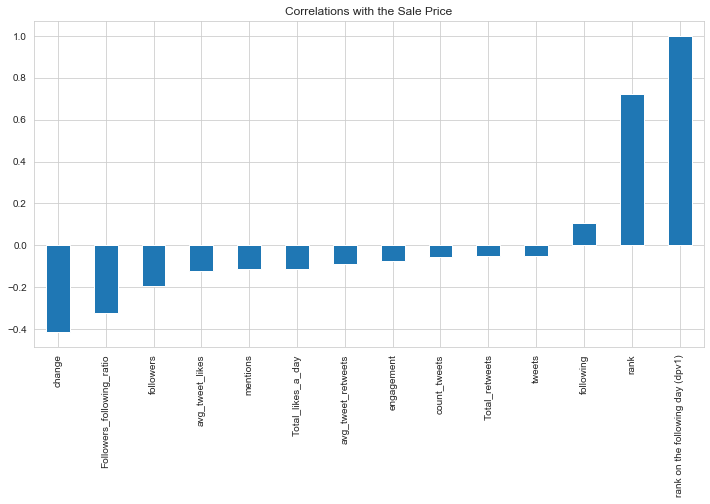

In [37]:
corr_with_rank_day1 = df.drop(["name","date",'rank 2 days later            ( dpv2)',
       'rank 3 days later          (dpv3)'], axis=1).corr()
plot_data = corr_with_rank_day1["rank on the following day (dpv1)"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with the Sale Price")
plt.show()
del plot_data

In [38]:
#CONVERTING DATAFRAME TO NUMPY ARRAYS
X = df.iloc[:, 2:-3].values
y = df.iloc[:, -3:].values

In [39]:
print(X)

[[1.00000000e+00 2.00000000e+00 2.00000000e+00 ... 5.49805506e-05
  1.00000000e+00 3.20000000e+01]
 [1.00000000e+00 3.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.00000000e+00 9.10000000e+01]
 [1.00000000e+00 1.00000000e+01 1.22800000e+02 ... 2.14881037e-03
  7.00000000e+00 6.80000000e+01]
 ...
 [1.00000000e+00 2.00000000e+01 1.50000000e-01 ... 9.16472680e-06
  2.00000000e+01 5.20000000e+01]
 [1.00000000e+00 2.00000000e+00 5.50000000e+00 ... 1.00564073e-04
  0.00000000e+00 9.20000000e+01]
 [1.00000000e+00 2.00000000e+00 2.00000000e+00 ... 2.29923378e-05
  1.00000000e+00 8.70000000e+01]]


In [40]:
print(X[0])

[1.00000000e+00 2.00000000e+00 2.00000000e+00 1.00000000e+00
 7.27530000e+04 4.96000000e+02 1.09973000e-04 4.00000000e+00
 2.00000000e+00 1.46679435e+02 5.49805506e-05 1.00000000e+00
 3.20000000e+01]


In [41]:
print(y)

[[29. 25. 31.]
 [81. 83. 84.]
 [61. 86. 92.]
 ...
 [58. 64. 44.]
 [78. 93. 93.]
 [87. 84. 88.]]


In [42]:
df.isnull().sum()

name                                    0
date                                    0
tweets                                  0
count_tweets                            0
avg_tweet_likes                         0
avg_tweet_retweets                      0
followers                               0
following                               0
change                                  0
Total_likes_a_day                       0
Total_retweets                          0
Followers_following_ratio               0
engagement                              0
mentions                                0
rank                                    0
rank on the following day (dpv1)        0
rank 2 days later            ( dpv2)    0
rank 3 days later          (dpv3)       0
dtype: int64

In [43]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42)

# MODEL CREATION

# xgboost

In [44]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

import xgboost


In [45]:

#Define the estimator
estimator = XGBRegressor(
    objective = 'reg:squarederror'

    )

# Define the model
my_model = MultiOutputRegressor(estimator = estimator, n_jobs = -1).fit(X_train, y_train)

In [46]:
y_pred = my_model.predict(X_test)

In [47]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

18.776148265298282


In [48]:
np.concatenate((y_test, y_pred), axis=1)

array([[45.        , 53.        , 50.        , 29.62282372, 21.28217316,
        34.32408905],
       [46.        ,  2.        ,  1.        , 38.81072235, 37.77988815,
        12.69128513],
       [ 2.        , 23.        , 40.        , 47.95705795, 56.96223831,
        52.14086533],
       ...,
       [10.        , 18.        ,  7.        , 29.14024925, 16.35372543,
        26.63450241],
       [ 3.        ,  3.        ,  3.        ,  5.06142569, -1.97644877,
         3.71120214],
       [71.        ,  4.        , 62.        , 23.8658371 , 50.31889343,
        14.92008018]])

# Regression Chain


In [49]:
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

In [50]:
model = LinearSVR()
wrapper = RegressorChain(model)
wrapper.fit(X_train,y_train)

RegressorChain(base_estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                        fit_intercept=True,
                                        intercept_scaling=1.0,
                                        loss='epsilon_insensitive',
                                        max_iter=1000, random_state=None,
                                        tol=0.0001, verbose=0),
               cv=None, order=None, random_state=None)

In [51]:
y_pred_wrap = wrapper.predict(X_test)

In [52]:

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_wrap)))

901.4291333091385


# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [54]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred_lin = lin_reg.predict(X_test)

In [56]:
print(y_pred_lin)

[[ 43.64007539  41.32454636  39.21968927]
 [ 48.69714812  49.36788116  47.88734343]
 [ 54.66722187  54.35324671  54.79196098]
 [ 67.407047    68.21358834  66.72007972]
 [ 44.72795668  46.38100086  44.53045089]
 [ 58.57505497  59.99069468  57.85190022]
 [ 19.91284473  20.02699807  20.89591974]
 [ 35.86864376  35.76312342  35.40257665]
 [ 78.31447565  77.7672366   77.57331467]
 [ 73.7085583   73.27123006  73.3909209 ]
 [ 28.90434834  28.60551703  29.62399482]
 [ 52.69885812  52.26992601  52.88138133]
 [ 31.82188069  31.57253648  32.57208973]
 [ 63.93515566  63.63443256  63.66613139]
 [ 79.65043127  79.33089468  79.61189846]
 [ 67.43912915  67.18124718  67.36132219]
 [ 43.37471785  43.24380971  43.77397211]
 [ 63.84155514  63.40937533  63.57062046]
 [ 55.0717222   55.58577978  54.89874362]
 [ 35.56745631  34.95013342  35.99491805]
 [ 48.74989919  48.45047875  49.03440789]
 [ 61.31726849  59.9732738   60.49619544]
 [ 49.42517873  49.34638984  49.89239119]
 [ 65.75302182  66.16446175  65.03

In [57]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_lin)))

19.8698597498763


# knn


In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=6, p=2, weights='distance')

In [59]:

knn_1 = KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=7, p=1, weights='distance')

In [60]:
cross_val_score(KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=6, p=1, weights='distance'),X,y,cv=5)

array([0.64399645, 0.67400834, 0.64348024, 0.63210103, 0.6212597 ])

In [61]:
knn_1.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='distance')

In [62]:
y_pred_knn = knn_1.predict(X_test)

In [63]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)))

15.462176092972905


Grid Search on KNN

In [64]:
leaf_size = range(10,40,5)
n_neighbors = range(4,20)
p =[1,2]
weights= ['uniform','distance']

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,weights = weights)
knn_2= KNeighborsRegressor()
reg = GridSearchCV(knn_2, hyperparameters, cv=5)
best_model = reg.fit(X_train,y_train)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weight:', best_model.best_estimator_.get_params()['weights'])

Best leaf_size: 10
Best p: 1
Best n_neighbors: 11
Best weight: distance


In [65]:
knn_3 = KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=11, p=1, weights='distance')

In [66]:
knn_3.fit(X_train,y_train)
y_pred_knn_3 = knn_3.predict(X_test)

In [67]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn_3)))

15.480732361148126


# Random forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor()

In [69]:
ran.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
y_pred_ran = ran.predict(X_test)

In [71]:
print(y_pred_ran)

[[44.7  31.7  29.9 ]
 [48.   47.9  42.6 ]
 [58.8  56.7  50.7 ]
 [68.6  65.8  59.8 ]
 [48.3  54.5  50.2 ]
 [61.9  54.4  39.5 ]
 [11.7   8.7   9.3 ]
 [27.6  34.8  41.5 ]
 [75.85 87.1  86.6 ]
 [72.1  71.   70.2 ]
 [42.4  39.6  23.4 ]
 [57.1  56.1  57.  ]
 [25.9  21.8  19.4 ]
 [47.7  47.6  53.  ]
 [47.65 60.65 66.2 ]
 [65.1  69.6  69.7 ]
 [42.9  45.7  37.15]
 [57.7  50.4  50.5 ]
 [46.2  42.9  50.3 ]
 [31.3  28.8  22.5 ]
 [60.8  48.8  63.6 ]
 [56.8  57.7  64.  ]
 [52.4  42.1  57.9 ]
 [77.8  74.7  77.5 ]
 [55.85 51.9  43.3 ]
 [22.5  16.9  21.  ]
 [44.2  40.6  38.4 ]
 [73.6  67.95 71.3 ]
 [62.4  53.95 61.3 ]
 [61.7  71.3  53.2 ]
 [51.9  76.3  68.  ]
 [48.95 44.9  34.35]
 [ 1.7   1.9   4.  ]
 [ 5.4   6.2   7.3 ]
 [14.4  16.3  14.4 ]
 [45.5  40.   46.2 ]
 [56.2  52.6  44.7 ]
 [ 6.9   9.    6.5 ]
 [50.7  61.1  56.4 ]
 [33.15 56.3  51.1 ]
 [66.85 61.2  69.6 ]
 [13.   10.5  14.2 ]
 [13.5  11.7  22.2 ]
 [20.6  22.9  19.4 ]
 [ 8.2   9.9   7.4 ]
 [72.1  72.5  65.3 ]
 [68.3  67.7  63.  ]
 [69.8  60.  

In [72]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_ran)))

18.928568007463927


# Decision tree

In [73]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor()

In [74]:
dectree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [75]:
y_pred_dec =dectree.predict(X_test)

In [76]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_dec)))

24.16259596889465


In [78]:
df_pred.head()

,name,date,tweets,count_tweets,avg_tweet_likes,avg_tweet_retweets,followers,following,change,Total_likes_a_day,Total_retweets,Followers_following_ratio,engagement,mentions,rank
0,NaN,NaN,-1,2.0,10.000000,0.5,72930,496,0.000412,20.0,1.0,147.036290,0.000274,0,6.0
1,NaN,NaN,1,3.0,0.333333,0.0,501153,65,-0.000060,1.0,0.0,7710.046154,0.000002,3,88.0
2,NaN,NaN,-1,10.0,24.500000,2.3,571362,1290,0.000021,245.0,23.0,442.916279,0.000429,10,64.0
3,NaN,NaN,1,4.0,0.250000,0.0,60224,767,0.000017,1.0,0.0,78.518905,0.000017,4,69.0
4,NaN,NaN,-1,20.0,0.300000,0.0,383830,6179,0.000086,6.0,0.0,62.118466,0.000016,20,49.0


In [79]:
df_pred.isnull().sum()

name                         744
date                         744
tweets                         0
count_tweets                  90
avg_tweet_likes                0
avg_tweet_retweets             0
followers                      0
following                      0
change                         0
Total_likes_a_day             90
Total_retweets                90
Followers_following_ratio      0
engagement                    90
mentions                       0
rank                           0
dtype: int64

In [80]:
df_pred.fillna(0, inplace=True)

In [81]:
X_sub = df_pred.iloc[:, 2:].values

In [82]:
print(X_sub)

[[-1.00000000e+00  2.00000000e+00  1.00000000e+01 ...  2.74235568e-04
   0.00000000e+00  6.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00  3.33333333e-01 ...  1.99539861e-06
   3.00000000e+00  8.80000000e+01]
 [-1.00000000e+00  1.00000000e+01  2.45000000e+01 ...  4.28799955e-04
   1.00000000e+01  6.40000000e+01]
 ...
 [-1.00000000e+00  2.00000000e+01  5.00000000e-02 ...  3.05169262e-06
   2.00000000e+01  1.40000000e+01]
 [ 1.00000000e+00  3.00000000e+00  1.16666667e+01 ...  3.20251810e-04
   1.00000000e+00  6.00000000e+01]
 [ 1.00000000e+00  2.00000000e+00  4.00000000e+00 ...  4.60034503e-05
   0.00000000e+00  6.90000000e+01]]


In [83]:
y_sub = knn_3.predict(X_sub)

In [84]:
print(y_sub)

[[24.22032411 19.66012248 20.9451883 ]
 [83.74432453 79.83431387 83.3637825 ]
 [69.22627362 75.45714269 78.99265217]
 ...
 [50.82107502 53.71781678 53.93168473]
 [55.43489967 56.83398392 56.3567513 ]
 [82.66166833 82.52758354 83.73856519]]


In [85]:
#CONVERTING THE ARRAY TO CSV FILE
df_submit = pd.DataFrame(y_sub, columns = ['rank1','rank2','rank3'])
df_submit.to_csv('final.csv', index=False)

On the dataset we applied various models and got KNN as the best model.